Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy.Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price.

We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Two datasets are being provided to us (test.csv, train.csv).

# Using the train dataset

In [813]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [814]:
#Loading the dataset
df=pd.read_csv('train.csv')

In [815]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


The train dataset contains of 81 columns.

In [816]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [817]:
#Checking the shape of the dataset
df.shape

(1168, 81)

Rows-1168

Columns-81

In [818]:
pd.set_option('display.max_columns',None)

In [819]:
#Checking the datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

int,object and float type data are present in the dataset

In [820]:
#Checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Null values are present,now we will look into the data very minutely.

EDA:-

In [821]:
#The first column in our train dataset i.e. 'Id' is not playing any role in predicting the price of the variable,so I am dropping the column from the dataset
df.drop(['Id'],axis=1,inplace=True)

In [822]:
#Now lets check the shape of the dataset after dropping column'Id'
df.shape

(1168, 80)

It is seen that now there are 80 columns in the new dataset

In [823]:
#Now we will see the next feature i.e 'MSSubClass' how it helps in predicting the price
#MSSubClass-Identifies the type of dwelling involved in the sale
#Lets analyse the data
df['MSSubClass'].value_counts()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

In [824]:
df['MSSubClass'].isnull().sum()

0

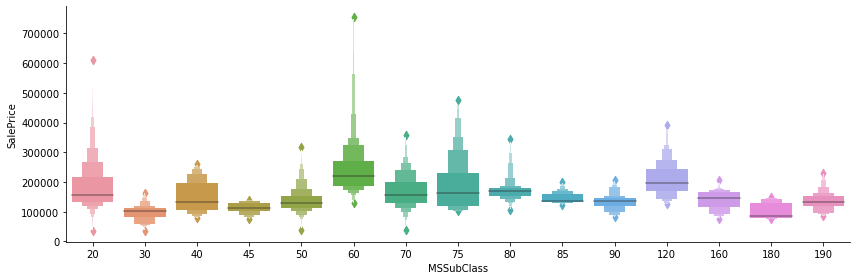

In [825]:
#MSSubClass Vs SalePrice
sns.catplot(y = "SalePrice", x = "MSSubClass", data = df.sort_values("SalePrice", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In the above figure,it is seen that when x=60 in MSSubClass then the SalePrice(y) is the highest.

When x=20,then also y is in the higher side.

When x=30,45,180 then the SalePrice(y) is in the lower side.

In [826]:
#Now lets analyse the next feature 'MSZoning'
#MSZoning-Identifies the general zoning classification of the sale
df['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [827]:
df['MSZoning'].isnull().sum()

0

In [828]:
#Encoding the object column 'MSZoning'
from sklearn.preprocessing import LabelEncoder
df['MSZoning']=LabelEncoder().fit_transform(df['MSZoning'])

In [829]:
df['MSZoning'].value_counts()

3    928
4    163
1     52
2     16
0      9
Name: MSZoning, dtype: int64

After label encoding,the object column is converted to int

0-C(all),
1-FV,
2-RH,
3-RL,
4-RM

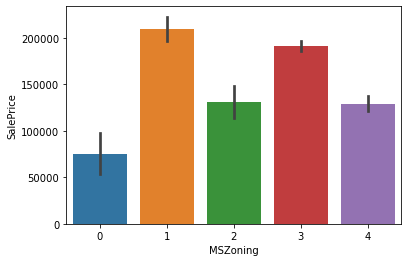

In [830]:
sns.barplot(x='MSZoning',y='SalePrice',data=df)

From the barplot,we can say that FV(floating village resdential)-1 and RL(residential low density)-3 is showing high SalePrice(y).

In [831]:
#Now lets analyse the next feature 'LotFrontage'
#LotFrontage-Linear feet of street connected to property
df['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

When we have checked the null values for all the features ,there are 214 null values in 'LotFrontage'

So now we have to remove the null values

In [832]:
#I will remove the null values using mean
df['LotFrontage']=df['LotFrontage'].fillna(np.mean(df['LotFrontage']))

In [833]:
#Let check the null values of the dataset again after removing the null values 
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [834]:
#Now lets analyse the next feature 'LotArea'
#LotArea-Lot size in square feet
df['LotArea'].value_counts()

9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

In [835]:
df['LotArea'].isnull().sum()

0

In [836]:
#Lets analyse the next feature 'Street'
#Street-Type of road access to property
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [837]:
#I will encode the data using LabelEncoder
df['Street']=LabelEncoder().fit_transform(df['Street'])

In [838]:
df['Street'].value_counts()

1    1164
0       4
Name: Street, dtype: int64

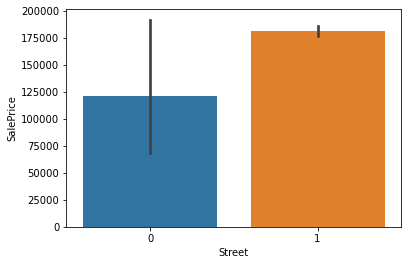

In [839]:
sns.barplot(x='Street',y='SalePrice',data=df)

From the barplot,it is seen that Grave-0 is having low SalePrice whereas paved-1 is having high SalePrice

In [840]:
#Lets analyse the next feature 'Alley'
#Alley-Type of alley access to property
#I think this feature is not important in deciding the SalePrice of the variable,so we can drop it
df.drop(['Alley'],axis=1,inplace=True)

In [841]:
#Lets move to the next feature analysis i.e.'LotShape'
#LotShape-General shape of property
df['LotShape'].value_counts()

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [842]:
df['LotShape'].isnull().sum()

0

In [843]:
#The feature is object type,we have to convert it to a form where machine learning model can understand
#Lets encode it using Label Encoder
df['LotShape']=LabelEncoder().fit_transform(df['LotShape'])

In [844]:
df['LotShape'].value_counts()

3    740
0    390
1     32
2      6
Name: LotShape, dtype: int64

0-IR1(Slightly irregular),	
1-IR2(Moderately Irregular),
2-IR3(Irregular),
3-Reg(Regular)

The feature is encoded,now we can see the relation between 'LotShape' and 'SalePrice' using barplot

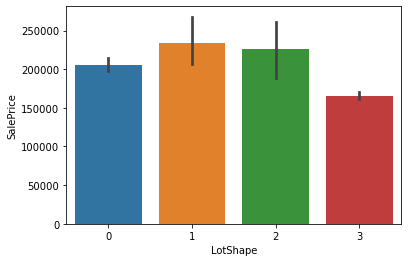

In [845]:
sns.barplot(x='LotShape',y='SalePrice',data=df)

Moderately irregular shape (IR2) is showing the high SalePrice where Regular shape(Reg) is showing the low SalePrice

In [846]:
#Moving to the next feature i.e.'LandContour'
#LandContour: Flatness of the property
#Lets analyse it
df['LandContour'].value_counts()

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [847]:
#Lvl-Near Flat/Level	
# Bnk--Banked - Quick and significant rise from street grade to building
#HLS--Hillside - Significant slope from side to side
#Low-Depression
#As the feature is an object type,lets encode it
df['LandContour']=LabelEncoder().fit_transform(df['LandContour'])

In [848]:
df['LandContour'].value_counts()

3    1046
0      50
1      42
2      30
Name: LandContour, dtype: int64

0-Bnk,
1-HLS,
2-Low,
3-Lvl

Let us see how this feature is related to the target variable 'SalePrice'


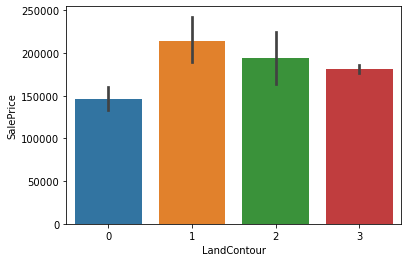

In [849]:
sns.barplot(x='LandContour',y='SalePrice',data=df)

From the bargraph,it is clearly seen that hillside land is having high SalePrice and banked land is showing low SalePrice

In [850]:
#Lets analyse the feature 'Utilities'
#Utilities: Type of utilities available
#AllPub--All public Utilities (E,G,W,& S)
#NoSewr--Electricity, Gas, and Water (Septic Tank)
#NoSeWa--Electricity and Gas Only
#ELO--Electricity only
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [851]:
#Encoding the object type column
df['Utilities']=df['Utilities'].replace('AllPub','1')

In [852]:
df['Utilities'].value_counts()

1    1168
Name: Utilities, dtype: int64

In [853]:
#We can drop the feature 'Utilities'because every property will include these utilities by default
df.drop(['Utilities'],axis=1,inplace=True)

In [854]:
#Analysing next feature 'LotConfig'
#LotConfig: Lot configuration
#Inside	Inside lot
#Corner	Corner lot
#CulDSac	Cul-de-sac
#FR2	Frontage on 2 sides of property
#FR3	Frontage on 3 sides of property
df['LotConfig'].value_counts()

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [855]:
#Now we have to encode the data as the column is in object type
df['LotConfig']=LabelEncoder().fit_transform(df['LotConfig'])

In [856]:
df['LotConfig'].value_counts()

4    842
0    222
1     69
2     33
3      2
Name: LotConfig, dtype: int64

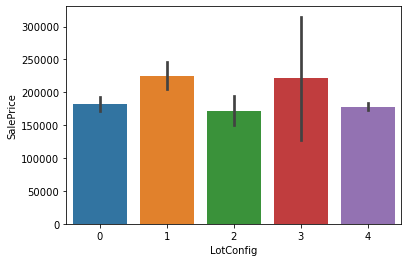

In [857]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='LotConfig',y='SalePrice',data=df)

CulDSac is showing the higher salePrice

In [858]:
#Analysing the next feature 'LandSlope'
#LandSlope: Slope of property
df['LandSlope'].value_counts()

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [859]:
##Now we have to encode the data as the column is in object type
df['LandSlope']=LabelEncoder().fit_transform(df['LandSlope'])

In [860]:
df['LandSlope'].value_counts()

0    1105
1      51
2      12
Name: LandSlope, dtype: int64

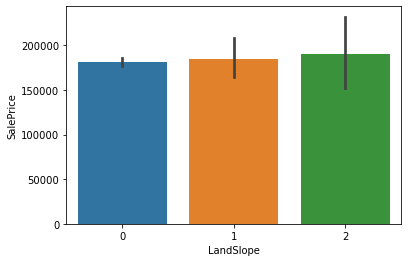

In [861]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='LandSlope',y='SalePrice',data=df)

Sev(Severe slope) is showing high SalePrice

In [862]:
#Lets analyse the next variable'Neighborhood'
#Neighborhood: Physical locations within Ames city limits
df['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [863]:
df['Neighborhood'].isnull().sum()

0

In [864]:
#This feature is an object type,so I will encode the data using LabelEncoder
df['Neighborhood']=LabelEncoder().fit_transform(df['Neighborhood'])

In [865]:
df['Neighborhood'].value_counts()

12    182
5     118
17     86
7      83
21     68
8      64
16     61
19     60
14     59
20     51
3      50
6      45
15     35
11     34
9      30
23     24
4      24
18     21
22     19
0      15
2      11
10      9
24      9
13      8
1       2
Name: Neighborhood, dtype: int64

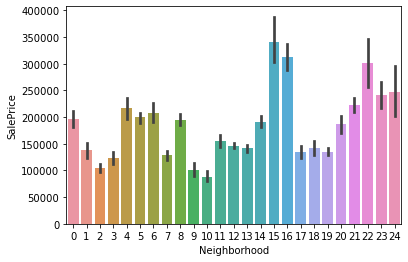

In [866]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Neighborhood',y='SalePrice',data=df)

NoRidge neighborhood is showing high SalePrice

In [867]:
#Lets analyse 'Condition1' feature
#Condition1: Proximity to various conditions
df['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [868]:
df['Condition1'].isnull().sum()

0

In [869]:
#converting object type column to int type
df['Condition1']=LabelEncoder().fit_transform(df['Condition1'])

In [870]:
df['Condition1'].value_counts()

2    1005
1      67
0      38
6      20
4      17
5       9
3       6
8       4
7       2
Name: Condition1, dtype: int64

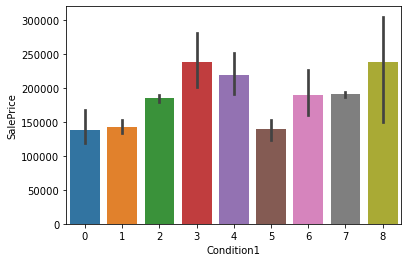

In [871]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Condition1',y='SalePrice',data=df)

PosA is showing high SalePrice according to the barplot

In [872]:
#Condition1 is similar to Condition2,so I will drop the feature 'Condition2'
df.drop(['Condition2'],axis=1,inplace=True)

In [873]:
#Lets analyse the feature'BldgType'
#BldgType: Type of dwelling
df['BldgType'].value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [874]:
#converting object type column to int type
df['BldgType']=LabelEncoder().fit_transform(df['BldgType'])

In [875]:
df['BldgType'].value_counts()

0    981
4     90
2     41
3     29
1     27
Name: BldgType, dtype: int64

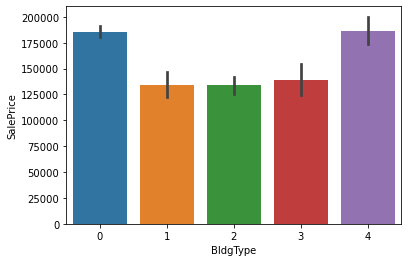

In [876]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='BldgType',y='SalePrice',data=df)

1Fam is showing the high SalePrice

In [877]:
#Lets analyse the feature 'HouseStyle'
#HouseStyle: Style of dwelling
df['HouseStyle'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [878]:
#converting object type column to int type
df['HouseStyle']=LabelEncoder().fit_transform(df['HouseStyle'])

In [879]:
df['HouseStyle'].value_counts()

2    578
5    361
0    121
7     47
6     32
1     12
4     10
3      7
Name: HouseStyle, dtype: int64

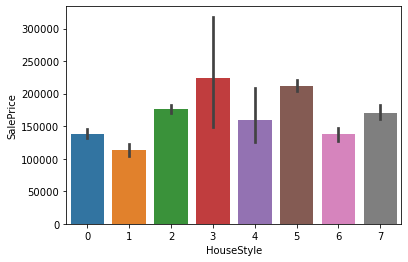

In [880]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='HouseStyle',y='SalePrice',data=df)

2.5Fin is showing high SalePrice

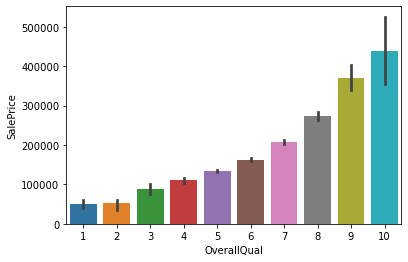

In [881]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='OverallQual',y='SalePrice',data=df)

In [882]:
#Analysing the feature 'OverallCond'
df['OverallCond'].value_counts()

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

In [883]:
df['OverallCond'].isnull().sum()

0

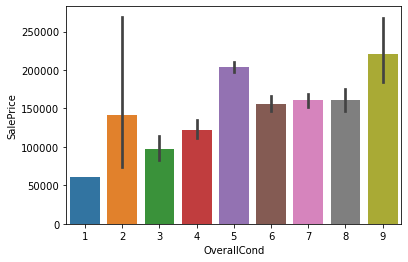

In [884]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='OverallCond',y='SalePrice',data=df)

In [885]:
#After looking at the data ,I feel we can drop the feature 'YearBuilt'because there is again a feature called 'YearRemodAdd' and in that feature every detail is present
df.drop(['YearBuilt'],axis=1,inplace=True)

In [886]:
#Now lets analyse our next feature 'RoofStyle'
#RoofStyle: Type of roof
df['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [887]:
df['RoofStyle'].isnull().sum()

0

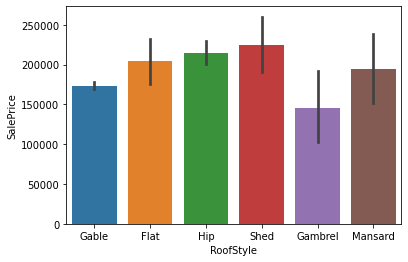

In [888]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='RoofStyle',y='SalePrice',data=df)

Shed roofstyle is showing the highest SalePrice

In [889]:
#Lets encode the data
df['RoofStyle']=LabelEncoder().fit_transform(df['RoofStyle'])

In [890]:
df['RoofStyle'].value_counts()

1    915
3    225
0     12
2      9
4      5
5      2
Name: RoofStyle, dtype: int64

In [891]:
#Lets analyse the feature 'RoofMatl'
#RoofMatl: Roof material
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

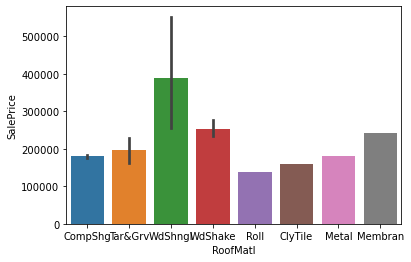

In [892]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='RoofMatl',y='SalePrice',data=df)

WdShng1(Wood Shingles) material is showing the highest SalePrice

In [893]:
#Lets encode the data
df['RoofMatl']=LabelEncoder().fit_transform(df['RoofMatl'])

In [894]:
df['RoofMatl'].value_counts()

1    1144
5      10
7       6
6       4
4       1
3       1
2       1
0       1
Name: RoofMatl, dtype: int64

In [895]:
#Analysing the next feature 'Exterior1st'
#Exterior1st: Exterior covering on house
df['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [896]:
df['Exterior1st'].isnull().sum()

0

In [897]:
#Lets encode the data
df['Exterior1st']=LabelEncoder().fit_transform(df['Exterior1st'])

In [898]:
df['Exterior1st'].value_counts()

11    396
5     179
7     178
12    174
8      93
4      42
3      41
10     22
13     19
0      19
9       2
6       1
2       1
1       1
Name: Exterior1st, dtype: int64

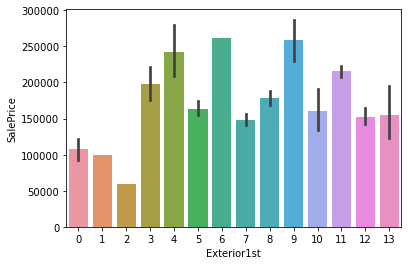

In [899]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Exterior1st',y='SalePrice',data=df)

Brick Common and Stone are showing the highest SalePrice

In [900]:
#The feature 'Exterior2nd' can be dropped as it is same like 'Exterior 1st'
df.drop(['Exterior2nd'],axis=1,inplace=True)

In [901]:
#I think we can drop the two features 'MasVnrType' and 'MasVnrArea' as these features are somewhere related to Exterior feature
df.drop(["MasVnrType", "MasVnrArea"], axis = 1, inplace = True)

In [902]:
#Again I think we can drop some more features from the dataset as those features are already analysed before
df.drop(["ExterQual", "ExterCond"], axis = 1, inplace = True)

In [903]:
#Analysing the feature 'Foundation'
#Foundation: Type of foundation
df['Foundation'].value_counts()

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

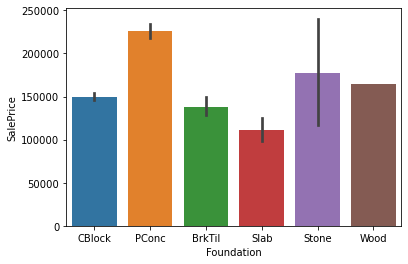

In [904]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Foundation',y='SalePrice',data=df)

Poured Concrete(PConc) is showing high SalePrice

In [905]:
#Lets encode the data
df['Foundation']=LabelEncoder().fit_transform(df['Foundation'])

In [906]:
df['Foundation'].value_counts()

1    516
2    513
0    112
3     21
4      5
5      1
Name: Foundation, dtype: int64

In [907]:
#Analysing our next feature 'BsmtQual'
#BsmtQual: Evaluates the height of the basement
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [908]:
df['BsmtQual'].isnull().sum()

30

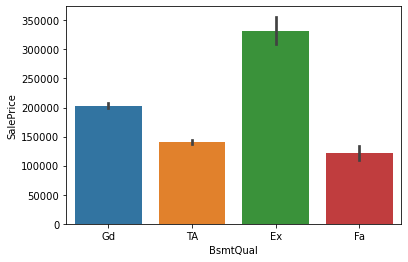

In [909]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='BsmtQual',y='SalePrice',data=df)

100+ inches height is showing the high SalePrice

In [910]:
#Lets encode the data
df['BsmtQual']=LabelEncoder().fit_transform(df['BsmtQual'])

In [911]:
#I will remove the null values using mean
df['BsmtQual']=df['BsmtQual'].fillna(np.mean(df['BsmtQual']))

In [912]:
#Analysing the feature 'BsmtCond'
#BsmtCond: Evaluates the general condition of the basement
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [913]:
df['BsmtCond'].isnull().sum()

30

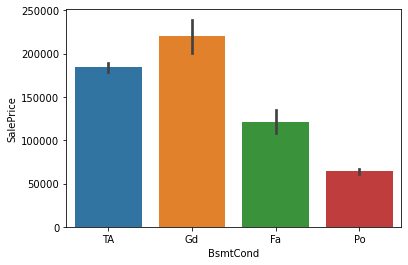

In [914]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='BsmtCond',y='SalePrice',data=df)

Gd(Good) is showing the highest SalePrice

In [915]:
#Lets encode the data
df['BsmtCond']=LabelEncoder().fit_transform(df['BsmtCond'])

In [916]:
#I will remove the null values using mean
df['BsmtCond']=df['BsmtCond'].fillna(np.mean(df['BsmtCond']))

In [917]:
#Analysing 'BsmtExposure'
#BsmtExposure: Refers to walkout or garden level walls
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [918]:
df['BsmtExposure'].isnull().sum()

31

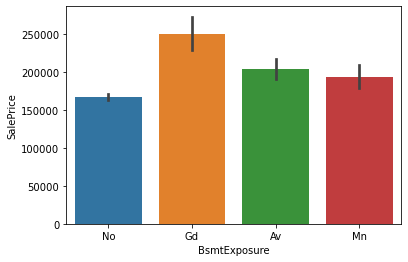

In [919]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='BsmtExposure',y='SalePrice',data=df)

Good Exposure(Gd) is showing high SalePrice

In [920]:
#Lets encode the data
df['BsmtExposure']=LabelEncoder().fit_transform(df['BsmtExposure'])

In [921]:
#I will remove the null values using mean
df['BsmtExposure']=df['BsmtExposure'].fillna(np.mean(df['BsmtExposure']))

In [922]:
df['BsmtExposure'].value_counts()

3    756
0    180
1    108
2     93
4     31
Name: BsmtExposure, dtype: int64

In [923]:
#Now analysing our next feature 'BsmtFinType1'
#BsmtFinType1: Rating of basement finished area
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [924]:
df['BsmtFinType1'].isnull().sum()

30

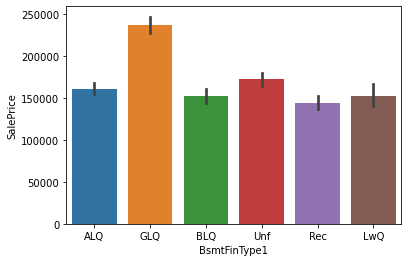

In [925]:
#GLQ	Good Living Quarters
#ALQ	Average Living Quarters
#BLQ	Below Average Living Quarters	
#Rec	Average Rec Room
#LwQ	Low Quality
#Unf	Unfinshed
#NA	No Basement
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='BsmtFinType1',y='SalePrice',data=df)

Good Living Quarters(GLQ) is showing the highest SalePrice

In [926]:
#Lets encode the data
df['BsmtFinType1']=LabelEncoder().fit_transform(df['BsmtFinType1'])

In [927]:
#I will remove the null values using mean
df['BsmtFinType1']=df['BsmtFinType1'].fillna(np.mean(df['BsmtFinType1']))

In [928]:
#Analysing 'BsmtFinType2'
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [929]:
df['BsmtFinType2'].isnull().sum()

31

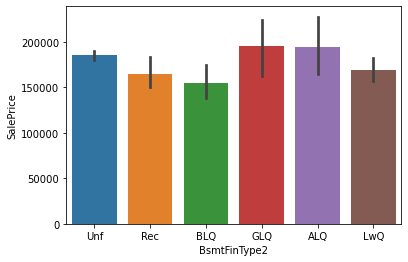

In [930]:
#'BsmtFinType2' vs 'SalePrice'
sns.barplot(x='BsmtFinType2',y='SalePrice',data=df)

Good Living Quarters(GLQ) and Average Living Quarters(ALQ) are showing the highest SalePrice for this feature

In [931]:
#Lets encode the data
df['BsmtFinType2']=LabelEncoder().fit_transform(df['BsmtFinType2'])

In [932]:
#I will remove the null values using mean
df['BsmtFinType2']=df['BsmtFinType2'].fillna(np.mean(df['BsmtFinType2']))

In [933]:
#Now I will anlayse the feature 'TotalBsmtSF' and dropping the others features 'BsmtFinSF1','BsmtFinSF2' and 'BsmtUnfSF'
#TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF
#TotalBsmtSF: Total square feet of basement area
df['TotalBsmtSF'].value_counts()

0       30
864     28
912     13
672     13
816     12
        ..
1459     1
1454     1
1444     1
1437     1
2046     1
Name: TotalBsmtSF, Length: 636, dtype: int64

In [934]:
df['TotalBsmtSF'].isnull().sum()

0

In [935]:
df.drop(["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF"], axis = 1, inplace = True)

In [936]:
#Lets analyse the feature 'Heating'
#Heating: Type of heating
df['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

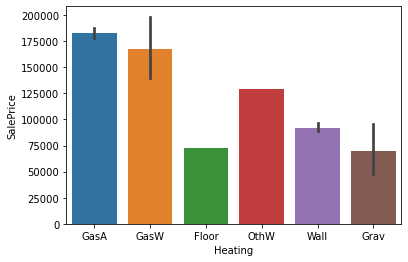

In [937]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Heating',y='SalePrice',data=df)

GasA(Gas forced warm air furnace) is showing high SalePrice

In [938]:
#Lets encode the data
df['Heating']=LabelEncoder().fit_transform(df['Heating'])

In [939]:
#HeatingQC: Heating quality and condition
#Lets analyse it
df['HeatingQC'].value_counts()

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [940]:
#Lets encode the data
df['HeatingQC']=LabelEncoder().fit_transform(df['HeatingQC'])

In [941]:
#CentralAir: Central air conditioning
#Lets analyse the feature
df['CentralAir'].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

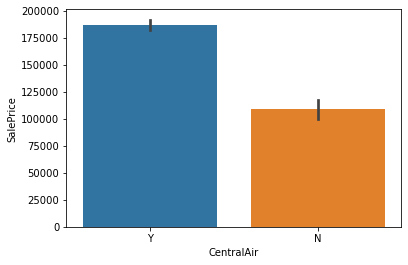

In [942]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='CentralAir',y='SalePrice',data=df)

In [943]:
#Lets encode the data
df['CentralAir']=LabelEncoder().fit_transform(df['CentralAir'])

In [944]:
#Now analysing the feature 'Electrical'
#Electrical: Electrical system
df['Electrical'].value_counts()

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

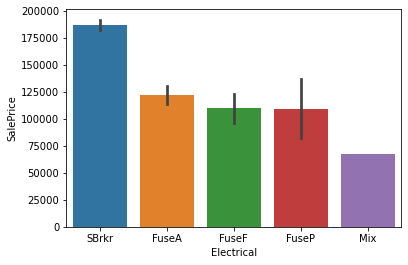

In [945]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Electrical',y='SalePrice',data=df)

SBrkr(Standard Circuit Breakers & Romex) is showing the highest SalePrice

In [946]:
#Lets encode the data
df['Electrical']=LabelEncoder().fit_transform(df['Electrical'])

In [947]:
df['2ndFlrSF'].value_counts()

0       663
728       9
504       7
600       6
546       6
       ... 
1134      1
1141      1
788       1
787       1
1872      1
Name: 2ndFlrSF, Length: 351, dtype: int64

In [948]:
df['LowQualFinSF'].value_counts()

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [949]:
#After checking the values for the above features,I think we can drop it
df.drop(["2ndFlrSF", "LowQualFinSF"], axis = 1, inplace = True)

In [950]:
#Lets analyse 'KitchenQual'
#KitchenQual: Kitchen quality
df['KitchenQual'].value_counts()

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

In [951]:
#Lets encode the data
df['KitchenQual']=LabelEncoder().fit_transform(df['KitchenQual'])

In [952]:
#Lets analyse 'Functional'
#Functional: Home functionality (Assume typical unless deductions are warranted)
df['Functional'].value_counts()

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

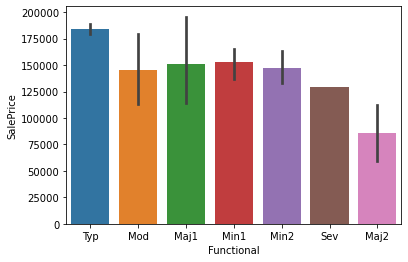

In [953]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Functional',y='SalePrice',data=df)

Typical Functionality(Typ) is showing highest SalePrice

In [954]:
#Lets encode the data
df['Functional']=LabelEncoder().fit_transform(df['Functional'])

In [955]:
#Lets analyse the feature 'Fireplaces'
df['Fireplaces'].value_counts()

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64

In [956]:
#Lets analyse 'FireplaceQu'
#FireplaceQu: Fireplace quality
df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

In [957]:
df['FireplaceQu'].isnull().sum()

551

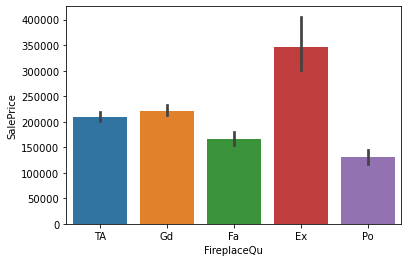

In [958]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='FireplaceQu',y='SalePrice',data=df)

 Ex	(Excellent - Exceptional Masonry Fireplace) is showing the highest SalePrice

In [959]:
#Lets encode the data
df['FireplaceQu']=LabelEncoder().fit_transform(df['FireplaceQu'])

In [960]:
#I will remove the null values using mean
df['FireplaceQu']=df['FireplaceQu'].fillna(np.mean(df['FireplaceQu']))

In [961]:
#Analysing 'GarageType'
#GarageType: Garage location
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

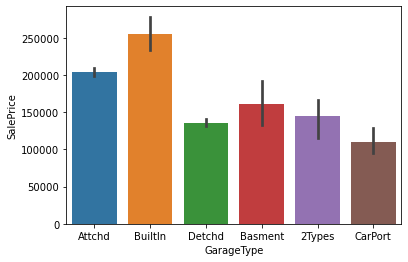

In [962]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='GarageType',y='SalePrice',data=df)

 BuiltIn(Built-In (Garage part of house - typically has room above garage)) is showing the highest SalePrice

In [963]:
#Lets encode the data
df['GarageType']=LabelEncoder().fit_transform(df['GarageType'])

In [964]:
#Now lets analyse 'GarageFinish'
#GarageFinish: Interior finish of the garage
df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

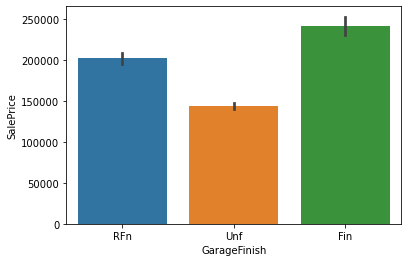

In [965]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='GarageFinish',y='SalePrice',data=df)

Fin(Finished) garage is showing high SalePrice

In [966]:
#Lets encode the data
df['GarageFinish']=LabelEncoder().fit_transform(df['GarageFinish'])

In [967]:
#checking the value counts of the feature 'GarageCars'
df['GarageCars'].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

In [968]:
#checking the value counts of the feature 'GarageArea'
df['GarageArea'].value_counts()

0       64
440     44
576     39
240     31
528     26
        ..
566      1
562      1
558      1
554      1
1418     1
Name: GarageArea, Length: 392, dtype: int64

In [969]:
df['GarageArea'].isnull().sum()

0

In [970]:
#Lets analyse 'GarageQual'
#GarageQual: Garage quality
df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

In [971]:
df['GarageQual'].isnull().sum()

64

In [972]:
#Lets encode the data
df['GarageQual']=LabelEncoder().fit_transform(df['GarageQual'])

In [973]:
#I will remove the null values using mean
df['GarageQual']=df['GarageQual'].fillna(np.mean(df['GarageQual']))

In [974]:
#Lets check "GarageCond"
#GarageCond: Garage condition
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [975]:
df['GarageCond'].isnull().sum()

64

In [976]:
#Lets encode the data
df['GarageCond']=LabelEncoder().fit_transform(df['GarageCond'])

In [977]:
#I will remove the null values using mean
df['GarageCond']=df['GarageCond'].fillna(np.mean(df['GarageCond']))

In [978]:
#Lets analyse 'PavedDrive'
#PavedDrive: Paved driveway
df['PavedDrive'].value_counts()

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

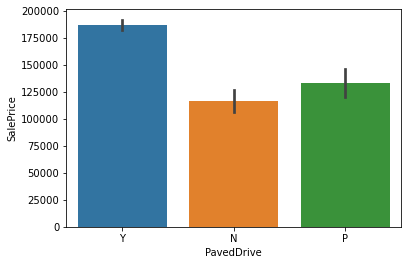

In [979]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='PavedDrive',y='SalePrice',data=df)

Y(paved) is showing high SalePrice

In [980]:
#Lets encode the data
df['PavedDrive']=LabelEncoder().fit_transform(df['PavedDrive'])

In [981]:
#Lets analyse 'WoodDeckSF'
#WoodDeckSF: Wood deck area in square feet
df['WoodDeckSF'].value_counts()

0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64

In [982]:
df['WoodDeckSF'].isnull().sum()

0

In [983]:
#Lets check 'OpenPorchSF'
#OpenPorchSF: Open porch area in square feet
df['OpenPorchSF'].value_counts()

0      531
36      24
48      18
20      17
24      14
      ... 
176      1
180      1
182      1
187      1
111      1
Name: OpenPorchSF, Length: 176, dtype: int64

In [984]:
#Lets check 'EnclosedPorch'
#EnclosedPorch: Enclosed porch area in square feet
df['EnclosedPorch'].value_counts()

0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64

In [985]:
#3SsnPorch: Three season porch area in square feet
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [986]:
#ScreenPorch: Screen porch area in square feet
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
126       3
       ... 
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, Length: 65, dtype: int64

In [987]:
#PoolArea: Pool area in square feet
df['PoolArea'].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [988]:
#Droping some features which are not contributing much in predicting SalePrice of the property
df.drop(["EnclosedPorch", "3SsnPorch","ScreenPorch","PoolArea"], axis = 1, inplace = True)

In [989]:
#Droping 'PoolQC'
df.drop(['PoolQC'],axis=1,inplace=True)

In [990]:
#Analysing 'Fence'
#Fence: Fence quality
df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [991]:
df['Fence'].isnull().sum()

931

In [992]:
#Lets encode the data
df['Fence']=LabelEncoder().fit_transform(df['Fence'])

In [993]:
#I will remove the null values using mean
df['Fence']=df['Fence'].fillna(np.mean(df['Fence']))

In [994]:
df['Fence'].value_counts()

4    931
2    129
0     51
1     47
3     10
Name: Fence, dtype: int64

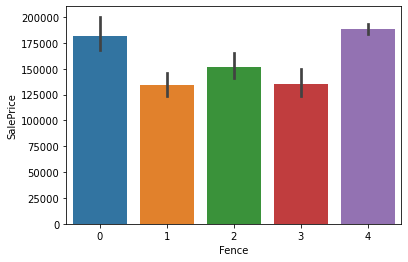

In [995]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='Fence',y='SalePrice',data=df)

In [996]:
#Lets analyse 'MiscFeature'
#MiscFeature: Miscellaneous feature not covered in other categories
df['MiscFeature'].value_counts()

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64

In [997]:
df['MiscFeature'].isnull().sum()

1124

In [998]:
#I think we can drop 'MiscFeature'
df.drop(['MiscFeature'],axis=1,inplace=True)

In [999]:
#Droping some more features which are not contributing much in predicting SalePrice of the property
df.drop(["MiscVal", "MoSold","YrSold"], axis = 1, inplace = True)

In [1000]:
#Lets move to the next feature 'SaleType'
#SaleType: Type of sale
df['SaleType'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

In [1001]:
df['SaleType'].isnull().sum()

0

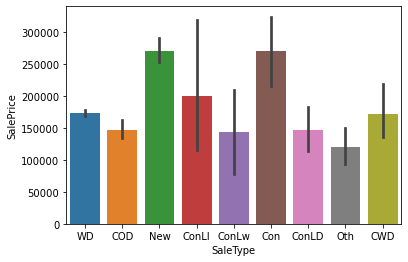

In [1002]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='SaleType',y='SalePrice',data=df)

New(Home just constructed and sold) and Con(Contract 15% Down payment regular terms)are showing high SalePrice

In [1003]:
#Lets encode the data
df['SaleType']=LabelEncoder().fit_transform(df['SaleType'])

In [1004]:
#Lets analyse 'SaleCondition'
#SaleCondition: Condition of sale
df['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [1005]:
df['SaleCondition'].isnull().sum()

0

In [1006]:
#Lets encode the data
df['SaleCondition']=LabelEncoder().fit_transform(df['SaleCondition'])

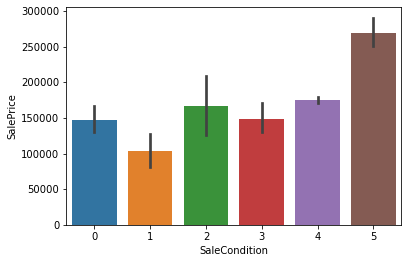

In [1007]:
#Let us see how this feature is related to the target variable 'SalePrice'
sns.barplot(x='SaleCondition',y='SalePrice',data=df)

In [1008]:
df['SaleCondition'].value_counts()

4    945
5    108
0     81
3     18
2     12
1      4
Name: SaleCondition, dtype: int64

 Partial(Home was not completed when last assessed (associated with New Homes)) is showing the highest SalePrice

In [1009]:
#Now lets check the datatypes again
df.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinType2       int32
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int32
TotRmsAbvGrd       int64


In [1010]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      64
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0


In [1011]:
df.shape

(1168, 57)

Rows-1168

columns-57

In [1012]:
#I will remove the null values using mean
df['GarageYrBlt']=df['GarageYrBlt'].fillna(np.mean(df['GarageYrBlt']))

In [1013]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [1014]:
df.head() #checking the first 5 rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,4,0,13,2,4,2,6,5,1976,1,1,8,1,2,3,3,0,5,1078,1,4,1,4,958,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,4,8,4,128000
1,20,3,95.00000,15865,1,0,3,4,1,12,2,0,2,8,6,1970,0,5,12,2,3,1,1,0,4,2217,1,0,1,4,2217,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,4,8,4,268000
2,60,3,92.00000,9920,1,0,3,1,0,15,2,0,5,7,5,1997,1,1,7,2,2,3,0,2,5,1117,1,0,1,4,1127,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,4,8,4,269790
3,20,3,105.00000,11751,1,0,3,4,0,14,2,0,2,6,6,1977,3,1,8,1,2,3,3,1,5,1844,1,0,1,4,1844,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,2,0,4,190000
4,20,3,70.98847,16635,1,0,3,2,0,14,2,0,2,6,7,2000,1,1,4,1,2,3,3,0,5,1602,1,2,1,4,1602,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,4,8,4,215000


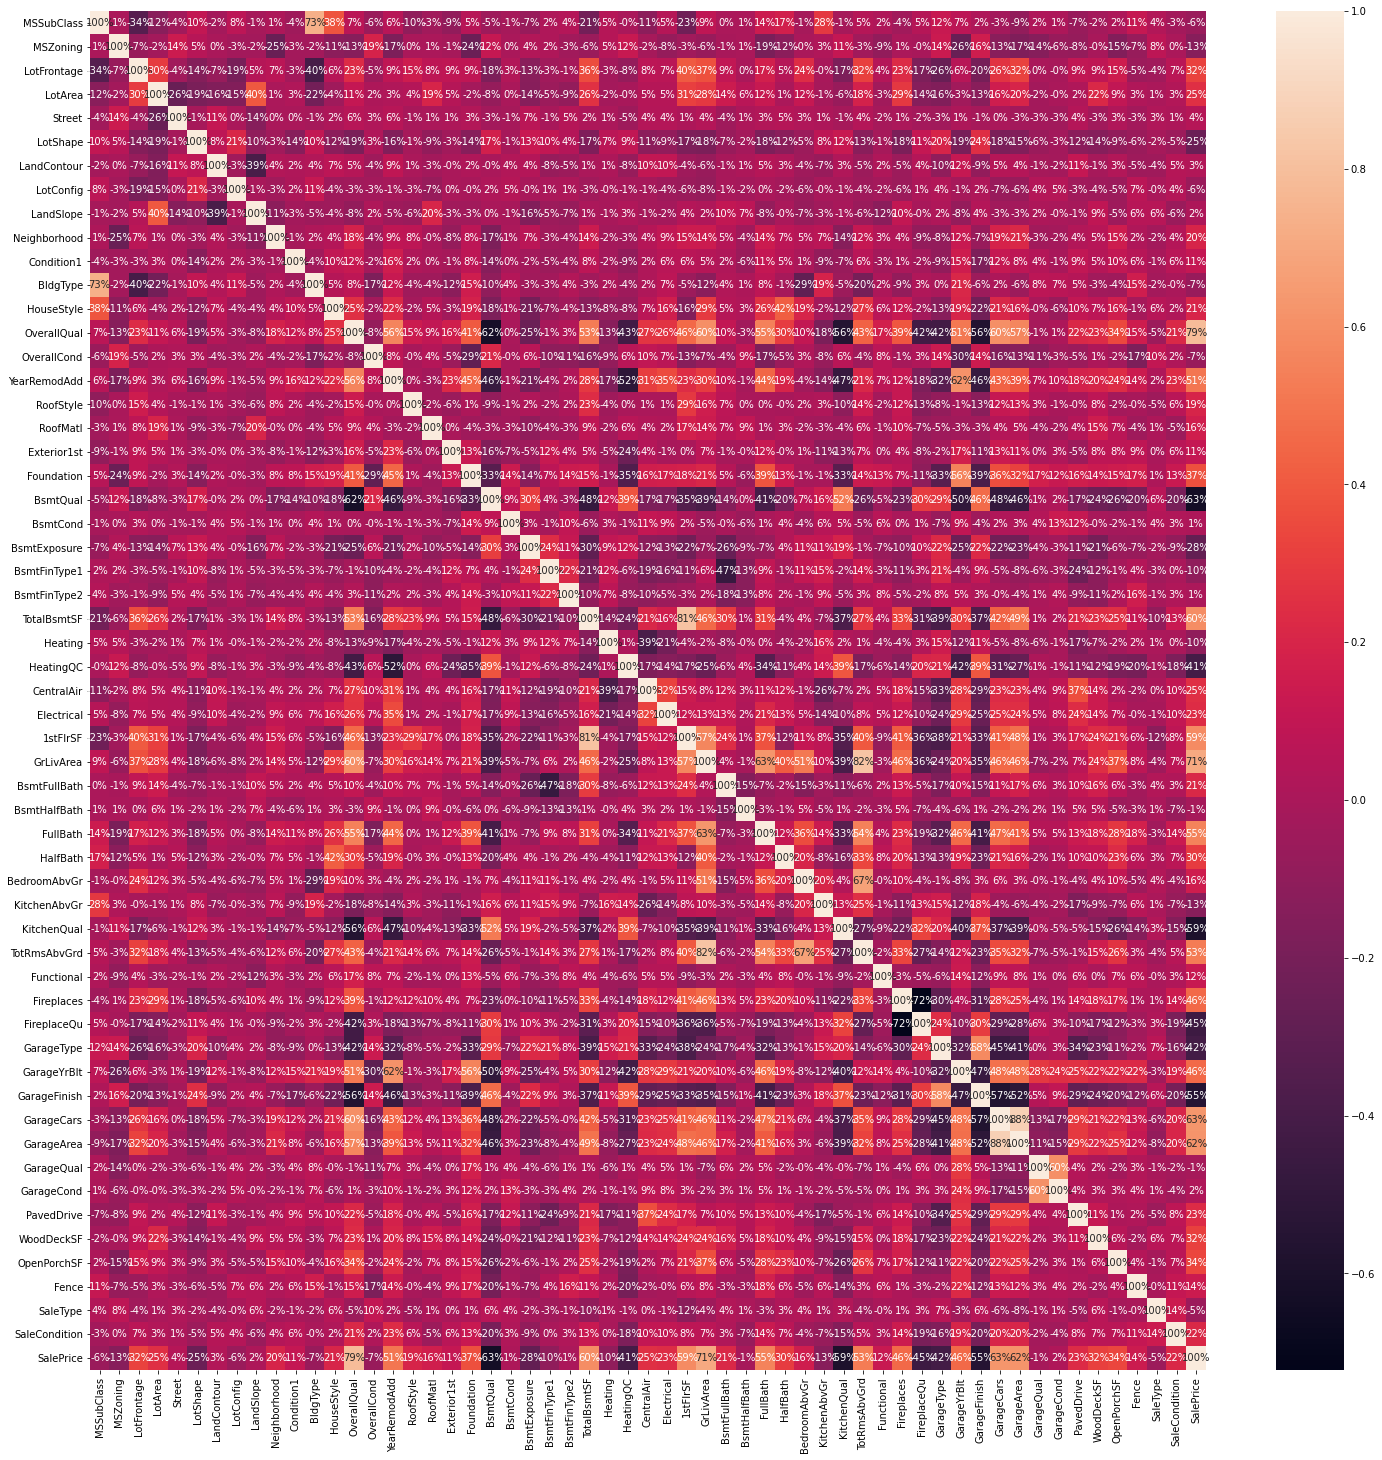

In [1016]:
#Visualizing the correlation
plt.figure(figsize=(25,25))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [1017]:
df.corr() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336681,-0.124151,-0.035981,0.104485,-0.021387,0.076880,-0.014930,0.013918,-0.042474,0.731815,0.381585,0.070462,-0.056978,0.056618,-0.100641,-0.032214,-0.090178,0.053951,-0.048527,-0.010637,-0.065262,0.017951,0.040392,-0.214042,0.047734,-0.001994,-0.113883,0.045533,-0.227927,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,-0.011378,0.051179,0.022913,-0.035792,0.045337,0.123336,0.073130,0.022831,-0.027639,-0.092408,0.021836,0.013325,-0.068702,-0.022609,0.017468,0.112138,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069661,-0.023328,0.140215,0.053655,0.001175,-0.027246,-0.023952,-0.251833,-0.025651,-0.024776,-0.110991,-0.134037,0.189553,-0.174586,0.000913,0.009719,-0.012037,-0.244844,0.118296,0.001456,0.036035,0.020794,-0.031203,-0.058896,0.051188,0.119852,-0.015887,-0.079205,-0.033095,-0.064125,-0.007287,0.006345,-0.188837,-0.121209,-0.001906,0.026744,0.111689,-0.031062,-0.091684,0.010658,-0.003746,0.135666,-0.261072,0.157271,-0.126031,-0.168364,-0.142153,-0.063541,-0.077280,-0.004509,-0.152694,-0.070105,0.079854,0.004501,-0.133221
LotFrontage,-0.336681,-0.069661,1.000000,0.299452,-0.035309,-0.144523,-0.073451,-0.192468,0.046051,0.065824,-0.025581,-0.403220,0.056321,0.229218,-0.047573,0.088799,0.146222,0.082566,0.087727,0.090734,-0.176032,0.033150,-0.126190,-0.034033,-0.013009,0.356107,-0.026622,-0.078262,0.077404,0.066868,0.403436,0.374251,0.094046,0.001389,0.171773,0.047816,0.237199,-0.002729,-0.174713,0.318771,0.039272,0.230610,-0.174345,-0.258609,0.055992,-0.202248,0.260252,0.322644,0.001424,-0.003021,0.092551,0.088334,0.151328,-0.052913,-0.035356,0.065091,0.323779
LotArea,-0.124151,-0.023328,0.299452,1.000000,-0.263973,-0.189201,-0.159038,-0.152063,0.395410,0.010707,0.029520,-0.215345,-0.040637,0.107188,0.017513,0.027228,0.038615,0.194142,0.048265,-0.021195,-0.076662,0.004206,-0.136699,-0.054607,-0.086864,0.259733,-0.020394,-0.003337,0.051182,0.050388,0.312843,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,-0.064278,0.184546,-0.033165,0.285983,-0.138983,-0.160511,-0.034765,-0.127509,0.158313,0.195162,-0.022988,-0.000812,0.021907,0.216720,0.093080,0.030193,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035309,-0.263973,1.000000,-0.012941,0.105226,0.000153,-0.141572,0.001420,0.002189,-0.013606,0.016793,0.057140,0.031082,0.057866,-0.006875,0.007889,0.012482,0.032701,-0.029007,-0.014410,0.065031,-0.005490,0.045803,0.016422,0.006981,-0.047968,0.043024,0.038720,0.011486,0.043322,-0.036483,0.013788,0.033208,0.045146,0.027587,0.012304,-0.012056,0.038259,-0.015309,0.010574,-0.018641,-0.030325,0.014288,-0.013940,0.002088,-0.025537,-0.029308,-0.030214,0.041318,-0.033142,0.029649,-0.027677,0.025920,0.014176,0.044753
LotShape,0.104485,0.053655,-0.144523,-0.189201,-0.012941,1.000000,0.081803,0.211395,-0.101187,-0.031852,-0.136885,0.099822,-0.116280,-0.189636,0.026931,-0.155428,-0.012410,-0.091341,-0.033798,-0.136443,0.167919,-0.009868,0.129202,0.103020,0.039245,-0.169062,0.071484,0.092617,-0.113719,-0.090459,-0.171928,-0.180021,-0.067889,-0.017926,-0.175359,-0.122586,-0.054438,0.082102,0.122861,-0.125990,-0.012018,-0.183316,0.107408,0.196219,-0.191280,0.239901,-0.183999,-0.153079,-0.059410,-0.026828,-0.122756,-0.142202,-0.090534,-0.059900,-0.015161,-0.054905,-0.248171
LandContour,-0.021387,0.001175,-0.073451,-0.159038,0.105226,0.081803,1.0000

'LotFrontage','LotArea','Neighborhood','Condition1','HouseStyle','OverallQual','YearRemodAdd','Foundation','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF'---These features are positively correlated with the target variable 'SalePrice'.

'OverallQual' is the feature which is more positively correlated with the target variable.

In [1018]:
#Splitting the independent and target variable in x and y
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [1019]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

I dont go with outlier removal and skewness removal because I already removed some columns which are not so important in predicting the target variable 'SalePrice' and as a result the shape of the dataset is already reduced.Also most of the columns in the dataset are object type where we dont apply outlier removal and skewness removal.

Model Building:-

In [1020]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

r2 score correspond to random state 40 is 0.6112434177767674
r2 score correspond to random state 40 is 0.7957170890953972
r2 score correspond to random state 40 is 0.8050968993277979
r2 score correspond to random state 40 is 0.7922028040335679
r2 score correspond to random state 40 is 0.8534634039863329
r2 score correspond to random state 40 is 0.8409173172090598
r2 score correspond to random state 41 is 0.7833856076003595
r2 score correspond to random state 41 is 0.7350797243681209
r2 score correspond to random state 41 is 0.7627597719416961
r2 score correspond to random state 41 is 0.7101273330427172
r2 score correspond to random state 41 is 0.8317668474460267
r2 score correspond to random state 41 is 0.8169322388067575
r2 score correspond to random state 42 is 0.6051341687093064
r2 score correspond to random state 42 is 0.7616472997879393
r2 score correspond to random state 42 is 0.7690299891107601
r2 score correspond to random state 42 is 0.7950941091173132
r2 score correspond to r

Above I am using for loop which helps me to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

The best model is GradientBoostingRegressor and the r2 score is 90% to random state 50.

In [1021]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,test_size=0.33)

In [1022]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(train_x,train_y)

GradientBoostingRegressor()

In [1024]:
y_pred=gb.predict(test_x)

In [1025]:
gb.score(train_x,train_y)

0.974951422618343

In [1026]:
gb.score(test_x,test_y)

0.9018028991868559

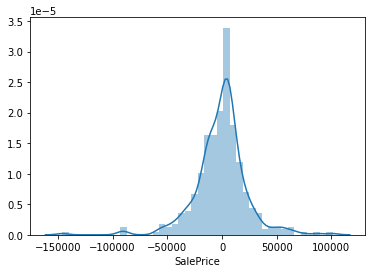

In [1027]:
sns.distplot(test_y-y_pred)
plt.show()

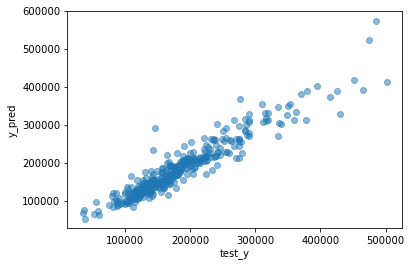

In [1028]:
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [1029]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,y_pred))
print('Mean Squared Error:',mean_squared_error(test_y,y_pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,y_pred)))

Mean Absolute Error: 16128.679107135193
Mean Squared Error: 565269816.3852301
Root Mean Absolute Error: 126.99873663598072


Hyperparameter tuning using RandomizedSearchCV

In [1034]:
from sklearn.model_selection import RandomizedSearchCV

In [1035]:
#List of parameters to pass
n_estimators = [100, 300, 500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
min_samples_split = [2, 4, 6]
min_samples_leaf = [1, 2, 4, 6]
learning_rate=[0.1]

In [1036]:
#Creating random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate':learning_rate}

In [1037]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=50, n_jobs = 1)

In [1038]:
gb_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimato

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1],
                                        'max_depth': [2, 3, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 300, 500]},
                   random_state=50, scoring='neg_mean_squared_error',
                   verbose=2)

In [1039]:
gb_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.1}

In [1040]:
gb=GradientBoostingRegressor(n_estimators=300,min_samples_split=4,min_samples_leaf=2,max_features='sqrt',max_depth=5,learning_rate=0.1)
gb.fit(train_x,train_y)
gb.score(train_x,train_y)
pred=gb.predict(test_x)
gbr=r2_score(test_y,pred)
print('R2 score:',gbr*100)

R2 score: 91.43201385045438


In [1041]:
from sklearn.model_selection import cross_val_score
gbscore=cross_val_score(gb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

Cross Val Score: 86.7082018643796


The accuracy of the model after hyperparameter tuning using RandomizedSearchCV is 91% and the cross validation score of the model is 87%.

After hyperparameter tuning the model's accuracy is increased by 4%.

In [1042]:
prediction = gb_random.predict(test_x)

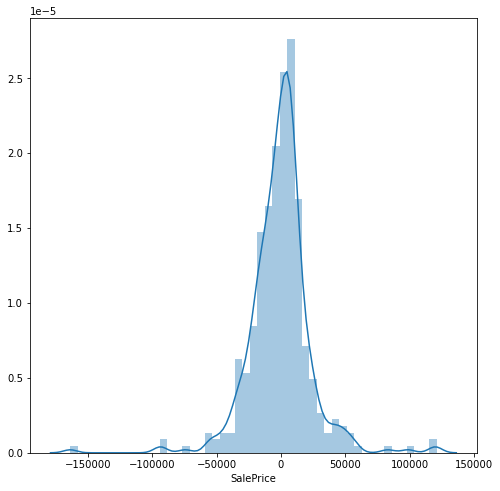

In [1043]:
plt.figure(figsize = (8,8))
sns.distplot(test_y-prediction)
plt.show()

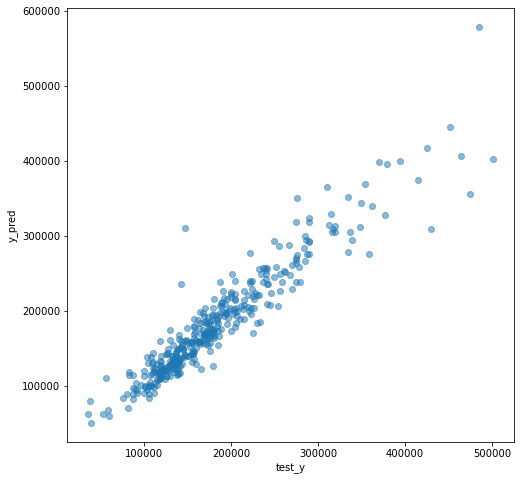

In [1044]:
plt.figure(figsize = (8,8))
plt.scatter(test_y, prediction, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [1045]:
#Saving the model
import pickle
filename='housing_prediction.pkl'
pickle.dump(gb,open(filename,'wb'))

# Using the test dataset

In [1046]:
#Loading the dataset
df_test=pd.read_csv('test.csv')

I will be performing all the steps with the test dataset as I have done with train dataset.

In [1047]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [1048]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1049]:
df_test.shape

(292, 80)

Rows-292

Columns-80

In [1050]:
pd.set_option('display.max_columns',None)

In [1051]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [1052]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [1053]:
df_test.drop(['Id'],axis=1,inplace=True)

In [1054]:
df_test.shape

(292, 79)

In [1055]:
df_test['MSSubClass'].value_counts()

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64

In [1056]:
df_test['MSSubClass'].isnull().sum()

0

In [1057]:
df_test['MSZoning'].value_counts()

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

In [1058]:
df_test['MSZoning'].isnull().sum()

0

In [1059]:
from sklearn.preprocessing import LabelEncoder
#Lets encode the data
df_test['MSZoning']=LabelEncoder().fit_transform(df_test['MSZoning'])

In [1060]:
df_test['MSZoning'].value_counts()

2    223
3     55
1     13
0      1
Name: MSZoning, dtype: int64

In [1061]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(np.mean(df_test['LotFrontage']))

In [1062]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [1064]:
df_test['LotArea'].value_counts()

7200     7
1680     4
7500     3
5400     3
8450     3
        ..
10335    1
14157    1
7599     1
8520     1
12800    1
Name: LotArea, Length: 249, dtype: int64

In [1065]:
df_test['LotArea'].isnull().sum()

0

In [1066]:
df_test['Street'].value_counts()

Pave    290
Grvl      2
Name: Street, dtype: int64

In [1067]:
df_test['Street']=LabelEncoder().fit_transform(df_test['Street'])

In [1068]:
df_test['Street'].value_counts()

1    290
0      2
Name: Street, dtype: int64

In [1069]:
df_test.drop(['Alley'],axis=1,inplace=True)

In [1070]:
df_test['LotShape'].value_counts()

Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64

In [1071]:
df_test['LotShape'].isnull().sum()

0

In [1072]:
df_test['LotShape']=LabelEncoder().fit_transform(df_test['LotShape'])

In [1073]:
df_test['LotShape'].value_counts()

3    185
0     94
1      9
2      4
Name: LotShape, dtype: int64

In [1074]:
df_test['LandContour']=LabelEncoder().fit_transform(df_test['LandContour'])

In [1075]:
df_test.drop(['Utilities'],axis=1,inplace=True)

In [1076]:
df_test['LotConfig']=LabelEncoder().fit_transform(df_test['LotConfig'])
df_test['LandSlope']=LabelEncoder().fit_transform(df_test['LandSlope'])

In [1077]:
df_test['Neighborhood'].isnull().sum()

0

In [1078]:
df_test['Neighborhood']=LabelEncoder().fit_transform(df_test['Neighborhood'])

In [1079]:
df_test['Condition1'].isnull().sum()

0

In [1080]:
df_test['Condition1']=LabelEncoder().fit_transform(df_test['Condition1'])

In [1081]:
df_test.drop(['Condition2'],axis=1,inplace=True)

In [1082]:
df_test['BldgType']=LabelEncoder().fit_transform(df_test['BldgType'])
df_test['HouseStyle']=LabelEncoder().fit_transform(df_test['HouseStyle'])

In [1083]:
df_test['OverallCond'].isnull().sum()

0

In [1084]:
df_test.drop(['YearBuilt'],axis=1,inplace=True)

In [1085]:
df_test['RoofStyle'].isnull().sum()

0

In [1086]:
df_test['RoofStyle']=LabelEncoder().fit_transform(df_test['RoofStyle'])

In [1087]:
df_test['RoofMatl']=LabelEncoder().fit_transform(df_test['RoofMatl'])

In [1088]:
df_test['Exterior1st'].isnull().sum()

0

In [1089]:
df_test['Exterior1st']=LabelEncoder().fit_transform(df_test['Exterior1st'])

In [1090]:
df_test.drop(['Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond'],axis=1,inplace=True)

In [1091]:
df_test['Foundation']=LabelEncoder().fit_transform(df_test['Foundation'])

In [1092]:
df_test['BsmtQual'].isnull().sum()

7

In [1093]:
df_test['BsmtQual']=LabelEncoder().fit_transform(df_test['BsmtQual'])

In [1094]:
df_test['BsmtQual']=df_test['BsmtQual'].fillna(np.mean(df_test['BsmtQual']))

In [1095]:
df_test['BsmtCond'].isnull().sum()

7

In [1096]:
df_test['BsmtCond']=LabelEncoder().fit_transform(df_test['BsmtCond'])

In [1097]:
df_test['BsmtCond']=df_test['BsmtCond'].fillna(np.mean(df_test['BsmtCond']))

In [1098]:
df_test['BsmtExposure'].isnull().sum()

7

In [1099]:
df_test['BsmtExposure']=LabelEncoder().fit_transform(df_test['BsmtExposure'])

In [1100]:
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(np.mean(df_test['BsmtExposure']))

In [1101]:
df_test['BsmtFinType1'].isnull().sum()

7

In [1102]:
df_test['BsmtFinType1']=LabelEncoder().fit_transform(df_test['BsmtFinType1'])

In [1103]:
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(np.mean(df_test['BsmtFinType1']))

In [1104]:
df_test['BsmtFinType2'].isnull().sum()

7

In [1105]:
df_test['BsmtFinType2']=LabelEncoder().fit_transform(df_test['BsmtFinType2'])

In [1106]:
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(np.mean(df_test['BsmtFinType2']))

In [1107]:
df_test['TotalBsmtSF'].isnull().sum()

0

In [1108]:
df_test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [1109]:
df_test['Heating']=LabelEncoder().fit_transform(df_test['Heating'])

In [1110]:
df_test['HeatingQC']=LabelEncoder().fit_transform(df_test['HeatingQC'])

In [1111]:
df_test['CentralAir']=LabelEncoder().fit_transform(df_test['CentralAir'])

In [1112]:
df_test['Electrical']=LabelEncoder().fit_transform(df_test['Electrical'])

In [1113]:
df_test.drop(['2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [1115]:
df_test['KitchenQual']=LabelEncoder().fit_transform(df_test['KitchenQual'])

In [1116]:
df_test['Functional']=LabelEncoder().fit_transform(df_test['Functional'])

In [1117]:
df_test['FireplaceQu'].isnull().sum()

139

In [1118]:
df_test['FireplaceQu']=LabelEncoder().fit_transform(df_test['FireplaceQu'])

In [1119]:
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(np.mean(df_test['FireplaceQu']))

In [1120]:
df_test['GarageType']=LabelEncoder().fit_transform(df_test['GarageType'])

In [1121]:
df_test['GarageFinish']=LabelEncoder().fit_transform(df_test['GarageFinish'])

In [1122]:
df_test['GarageArea'].isnull().sum()

0

In [1123]:
df_test['GarageQual'].isnull().sum()

17

In [1124]:
df_test['GarageQual']=LabelEncoder().fit_transform(df_test['GarageQual'])

In [1125]:
df_test['GarageQual']=df_test['GarageQual'].fillna(np.mean(df_test['GarageQual']))

In [1126]:
df_test['GarageCond'].isnull().sum()

17

In [1127]:
df_test['GarageCond']=LabelEncoder().fit_transform(df_test['GarageCond'])

In [1128]:
df_test['GarageCond']=df_test['GarageCond'].fillna(np.mean(df_test['GarageCond']))

In [1129]:
df_test['PavedDrive']=LabelEncoder().fit_transform(df_test['PavedDrive'])

In [1131]:
df_test['WoodDeckSF'].isnull().sum()

0

In [1132]:
df_test.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC'],axis=1,inplace=True)

In [1133]:
df_test['Fence'].isnull().sum()

248

In [1134]:
df_test['Fence']=LabelEncoder().fit_transform(df_test['Fence'])

In [1135]:
df_test['Fence']=df_test['Fence'].fillna(np.mean(df_test['Fence']))

In [1136]:
df_test.drop(['MiscFeature','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

In [1137]:
df_test['SaleType'].isnull().sum()

0

In [1138]:
df_test['SaleType']=LabelEncoder().fit_transform(df_test['SaleType'])

In [1139]:
df_test['SaleCondition'].isnull().sum()

0

In [1140]:
df_test['SaleCondition']=LabelEncoder().fit_transform(df_test['SaleCondition'])

In [1141]:
df_test.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinType2       int32
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64


In [1142]:
df_test.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      17
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0


In [1143]:
df_test.shape

(292, 56)

In [1144]:
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(np.mean(df_test['GarageYrBlt']))

In [1145]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [1146]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,21,2,0,2,9,5,2006,3,0,9,2,0,2,1,2,5,1922,0,0,1,3,1922,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,4,5,2
1,120,2,66.425101,5814,1,0,3,1,0,21,2,4,2,8,5,1984,1,0,5,1,2,2,0,2,5,1220,0,2,1,3,1360,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,4,0,0
2,20,2,66.425101,11838,1,3,3,4,0,4,2,0,2,8,5,2001,3,0,9,2,2,2,0,5,5,1753,0,0,1,3,1788,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,4,5,2
3,70,2,75.000000,12000,1,3,0,4,0,5,2,0,5,7,7,1950,1,0,6,1,3,2,3,4,5,704,0,0,1,3,860,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,4,5,2
4,60,2,86.000000,14598,1,0,3,1,0,20,1,0,5,6,5,2007,1,0,9,2,2,2,2,5,5,894,0,0,1,3,894,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,4,5,2


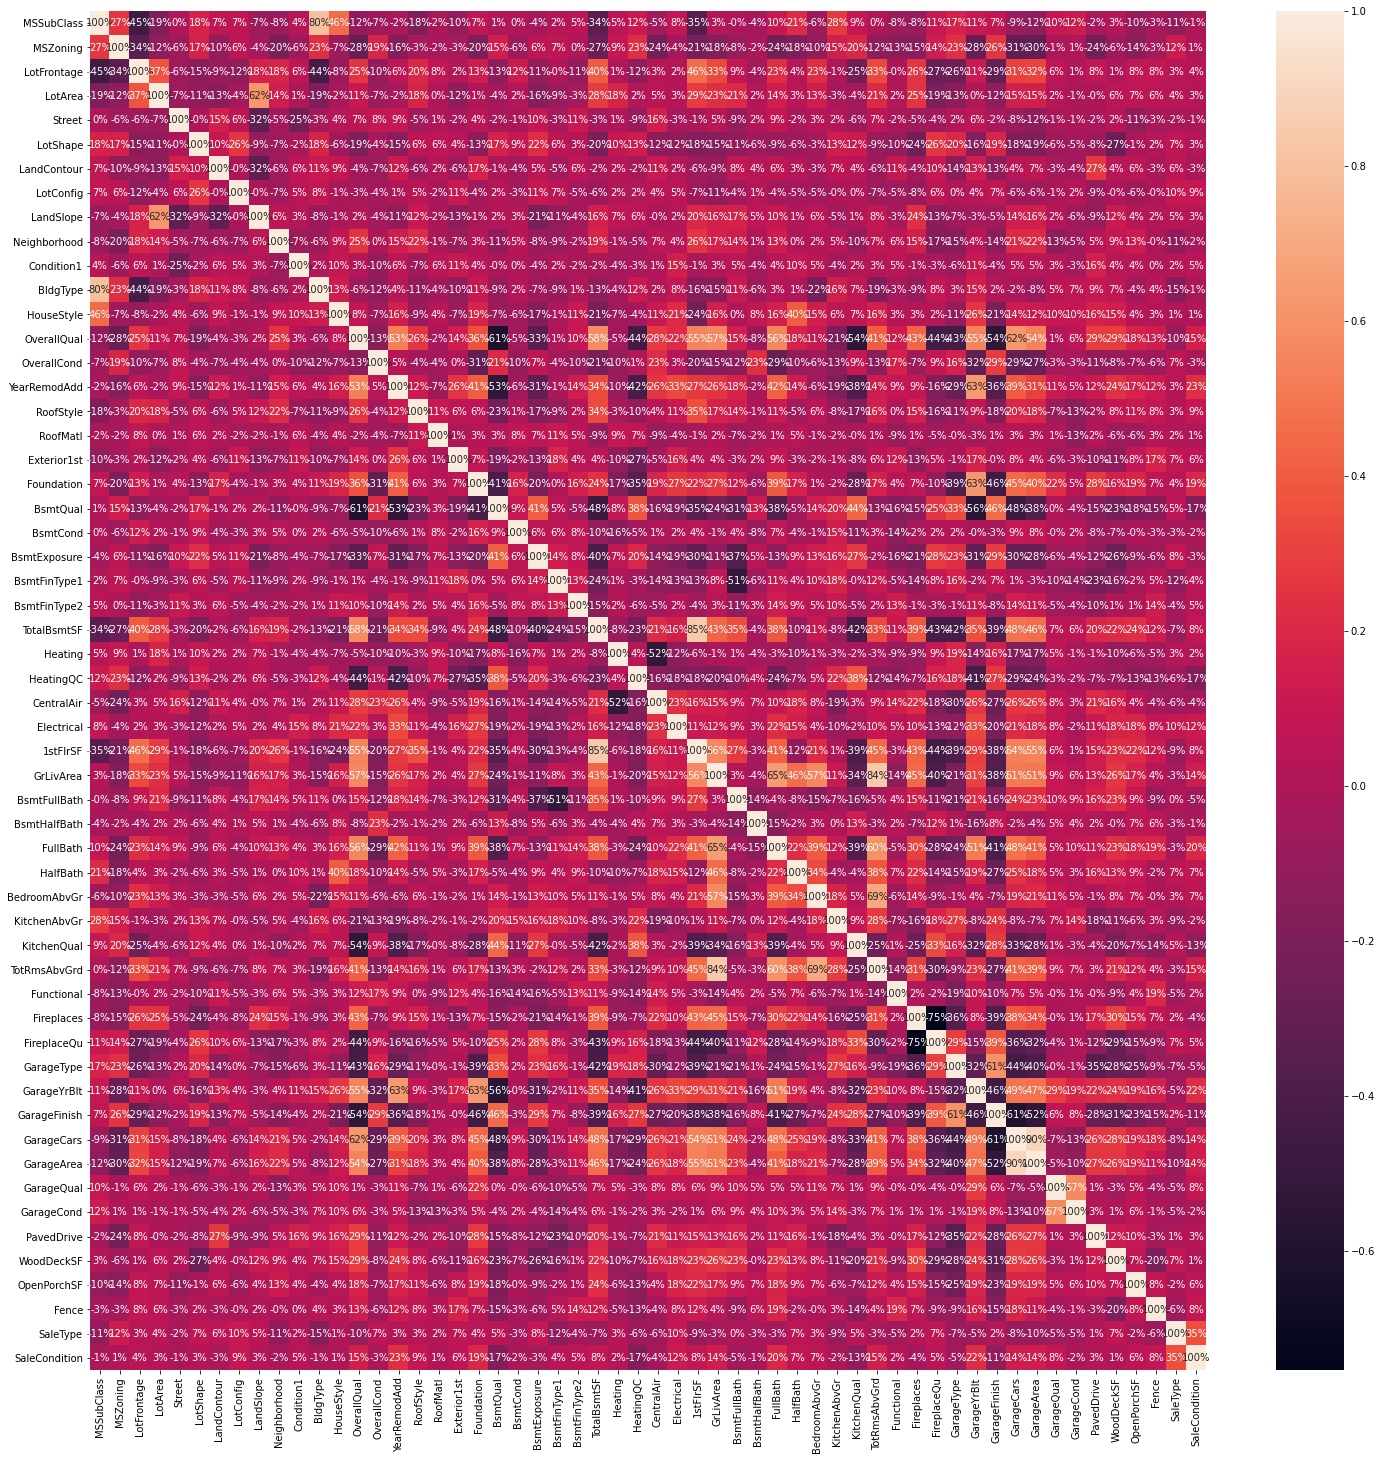

In [1147]:
plt.figure(figsize=(25,25))  
sns.heatmap(df_test.corr(), annot=True, fmt='.0%')

In [1148]:
df_test.corr() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition
MSSubClass,1.000000,2.665174e-01,-0.454786,-0.186654,0.004588,0.176681,0.068736,0.071784,-0.073979,-0.081962,0.042599,0.798007,0.455233,-0.116077,-0.068113,-0.023317,-0.183492,-0.019367,-0.103303,0.072808,0.006993,0.002947,-0.042915,0.016411,4.902643e-02,-0.336822,0.049709,0.118102,-0.053192,0.077471,-0.350270,0.030615,-0.000676,-0.041577,0.095903,0.213601,-0.061750,0.275461,0.093439,0.002973,-0.075457,-0.084663,0.107094,0.171592,0.107969,0.072008,-0.086798,-0.122536,0.095108,0.124369,-0.024900,0.028190,-0.097449,-0.029287,-0.105307,-0.010155
MSZoning,0.266517,1.000000e+00,-0.335754,-0.117968,-0.063162,0.167716,-0.099137,0.055261,-0.035312,-0.204984,-0.059909,0.230251,-0.068366,-0.276394,0.191126,-0.159359,-0.031210,-0.022604,-0.028611,-0.195382,0.149432,-0.060260,0.062317,0.068649,1.475225e-16,-0.270929,0.094397,0.228922,-0.235065,-0.036969,-0.212694,-0.176389,-0.084559,-0.017534,-0.236326,-0.179885,-0.104881,0.150506,0.198917,-0.123578,-0.131738,-0.148498,0.143330,0.234114,-0.277839,0.256200,-0.306561,-0.304614,-0.012294,0.006196,-0.236680,-0.055536,-0.139292,-0.029749,0.123993,0.005290
LotFrontage,-0.454786,-3.357540e-01,1.000000,0.370091,-0.056531,-0.147720,-0.086163,-0.124470,0.176406,0.184817,0.064350,-0.436593,-0.080950,0.254760,-0.096571,0.056610,0.199222,0.077308,0.018168,0.130965,-0.128439,0.123584,-0.109109,-0.000968,-1.096747e-01,0.398795,0.011852,-0.118978,0.031703,0.021673,0.463473,0.333808,0.085464,-0.044632,0.227718,0.036555,0.227534,-0.011201,-0.246413,0.328972,-0.002318,0.255314,-0.271310,-0.255265,0.110970,-0.292203,0.306181,0.317132,0.060868,0.011068,0.076602,0.006654,0.075946,0.077279,0.034876,0.037168
LotArea,-0.186654,-1.179681e-01,0.370091,1.000000,-0.069626,-0.110574,-0.131482,-0.042599,0.620079,0.137189,0.010799,-0.190456,-0.015258,0.109161,-0.071113,-0.022957,0.182766,0.004290,-0.124700,0.013464,-0.041575,0.015952,-0.159823,-0.086497,-3.118339e-02,0.283111,0.179646,0.016198,0.049270,0.027693,0.286714,0.231721,0.212162,0.020883,0.141118,0.034980,0.134990,-0.030264,-0.041457,0.211624,0.015773,0.250416,-0.193645,-0.130796,0.000671,-0.123804,0.154919,0.152737,0.023636,-0.014937,-0.003237,0.059117,0.067269,0.057443,0.037096,0.030689
Street,0.004588,-6.316151e-02,-0.056531,-0.069626,1.000000,-0.002444,0.153613,0.058229,-0.324146,-0.045972,-0.246714,-0.028820,0.043073,0.066173,0.077702,0.092244,-0.054925,0.006540,-0.021532,0.043091,-0.018491,-0.010849,0.098649,-0.032068,1.098513e-01,-0.029632,0.011782,-0.085239,0.156680,-0.025503,-0.013672,0.045793,-0.094062,0.021908,0.087362,-0.023607,0.030347,0.018095,-0.062637,0.068251,-0.018670,-0.054111,-0.041473,0.018636,0.060197,-0.021369,-0.084965,-0.117624,-0.009110,-0.005330,-0.023367,0.022791,-0.106646,-0.032991,-0.019125,-0.012345
LotShape,0.176681,1.677157e-01,-0.147720,-0.110574,-0.002444,1.000000,0.100105,0.262901,-0.094606,-0.067832,-0.022692,0.178101,-0.056015,-0.193911,-0.041775,-0.147522,0.064795,0.058711,0.038251,-0.130809,0.171486,0.089701,0.220147,0.064642,3.114007e-02,-0.203827,0.096532,0.132497,-0.122514,-0.115931,-0.175275,-0.154147,-0.110572,-0.061833,-0.094588,-0.062975,-0.031843,0.131231,0.118826,-0.093797,-0.100522,-0.240595,0.263627,0.200450,-0.163792,0.187518,-0.183139,-0.191254,-0.059338,-0.047848,-0.075440,-0.270154,-0.013809,0.019342,0.072375,0.033945
LandContour,0.068736,-9.913689e-02,-0.086163,-0.131482,0.153613,0.100105,1.000000,-0.00062

In [1149]:
#Load the model
fitted_model=pickle.load(open('housing_prediction.pkl','rb'))

In [1150]:
fitted_model

GradientBoostingRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=4, n_estimators=300)

In [1151]:
#Prediction over test data
predictions=fitted_model.predict(df_test)

In [1152]:
predictions

array([396471.69086827, 356108.94050846, 383399.72454315, 312798.97423238,
       387442.2851028 , 307473.96583984, 304657.27523817, 386711.15317038,
       412576.54370069, 388613.16862011, 342622.00045669, 299712.55023164,
       305742.59475631, 313261.26745943, 392269.80810997, 300900.75691348,
       302569.60687673, 308530.20516788, 375010.92281963, 368090.64933046,
       313967.79965712, 336336.57642803, 367195.14988289, 301550.90442134,
       305633.23271371, 337494.92251203, 376999.27311215, 298258.71358887,
       371916.79865857, 305991.07643491, 310041.02569771, 364584.75030158,
       378553.64783286, 339026.03677587, 338971.44952082, 413526.02958709,
       381776.40020394, 412991.90091579, 304703.42569999, 414768.40752781,
       311333.8074983 , 379524.74732025, 390249.19911569, 364584.75030158,
       318267.55123284, 312035.65463685, 328863.44055474, 321655.49212559,
       369875.17870548, 410369.24775009, 361908.24482175, 364858.88981391,
       300255.81711248, 3